In [ ]:
https://danijar.com/variable-sequence-lengths-in-tensorflow/ --padding

In [1]:
from __future__ import print_function

import numpy as np
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from numpy.random import choice

USE_SEQUENCES = False
USE_STATELESS_MODEL = False

# you can all the four possible combinations
# USE_SEQUENCES and USE_STATELESS_MODEL

max_len = 20

N_train = 100
N_test = 10
N = N_train + N_test

var_length_arr = choice(a=range(1, max_len), size=N, replace=True)

x = []
for i in range(N):
    x.append(np.zeros((var_length_arr[i], 1)))

y = np.zeros((N, 1))
one_indexes = choice(a=N, size=int(0.5 * N), replace=False)
for i in one_indexes:
    x[i][0] = 1
    y[i] = 1

X_train = x[:N_train]
X_test = x[N_train:]

y_train = y[:N_train]
y_test = y[N_train:]



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
len(X_train), len(X_train[0]), X_train[0]

(100, 3, array([[1.],
        [0.],
        [0.]]))

In [3]:
len(y_train), y_train[0]

(100, array([1.]))

In [4]:
y_train[0:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [5]:
X_train[8]
    

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
# STATEFUL MODEL
print('Build STATEFUL model...')
model = Sequential()
model.add(LSTM(10,
               batch_input_shape=(1, 1, 1),
               return_sequences=False,
               stateful=True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Train...')
for epoch in range(15):
    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(len(X_train)):
        y_true = y_train[i]
        for j in range(len(X_train[i])):
            tr_loss, tr_acc = model.train_on_batch(np.reshape(X_train[i][j], (1, 1, 1)), np.array([y_true]))
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()

    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')

    mean_te_acc = []
    mean_te_loss = []
    for i in range(len(X_test)):
        for j in range(len(X_test[i])):
            te_loss, te_acc = model.test_on_batch(np.reshape(X_test[i][j], (1, 1, 1)), y_test[i])
            mean_te_acc.append(te_acc)
            mean_te_loss.append(te_loss)
        model.reset_states()

        for j in range(len(X_test[i])):
            y_pred = model.predict_on_batch(np.reshape(X_test[i][j], (1, 1, 1)))
            if epoch == 14 :
                print (i,j)
                print (X_test[i][j])
                print (y_pred)
        model.reset_states()

    print('accuracy testing = {}'.format(np.mean(mean_te_acc)))
    print('loss testing = {}'.format(np.mean(mean_te_loss)))
    print('___________________________________')

Build STATEFUL model...
Train...
accuracy training = 0.7470119595527649
loss training = 0.5979994535446167
___________________________________
accuracy testing = 1.0
loss testing = 0.16642606258392334
___________________________________
accuracy training = 1.0
loss training = 0.07470168173313141
___________________________________
accuracy testing = 1.0
loss testing = 0.02367839589715004
___________________________________
accuracy training = 1.0
loss training = 0.020668162032961845
___________________________________
accuracy testing = 1.0
loss testing = 0.00875587947666645
___________________________________
accuracy training = 1.0
loss training = 0.008386521600186825
___________________________________
accuracy testing = 1.0
loss testing = 0.0036165467463433743
___________________________________
accuracy training = 1.0
loss training = 0.0035980308894068003
___________________________________
accuracy testing = 1.0
loss testing = 0.0016430531395599246
_______________________________

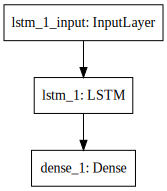

In [7]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [9]:
len(X_train[-1])

4

In [11]:
y_pred

array([[1.4478506e-09]], dtype=float32)

In [ ]:
from __future__ import print_function

import numpy as np
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from numpy.random import choice

USE_SEQUENCES = False
USE_STATELESS_MODEL = False

# [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

# you can all the four possible combinations
# USE_SEQUENCES and USE_STATELESS_MODEL

max_len = 20

N_train = 100
N_test = 10
N = N_train + N_test

cutoff = 0.8
template = np.array([1, 0] * max_len)
x = []
y = []
for i in range(N):
    min_max = choice(a=range(len(template)), size=2, replace=False)
    x_sub_sequence = template[min(min_max):max(min_max)]
    y_sub_sequence = 1 - x_sub_sequence
    x.append(x_sub_sequence)
    y.append(y_sub_sequence)

N = len(x)  # update N

X_train = x[:N_train]
X_test = x[N_train:]

y_train = y[:N_train]
y_test = y[N_train:]

# STATEFUL MODEL
print('Build STATEFUL model...')
model = Sequential()
model.add(LSTM(10,
               batch_input_shape=(1, 1, 1),
               return_sequences=False,
               stateful=True))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Train...')
for epoch in range(15):
    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(len(X_train)):
        y_true = y_train[i]
        for j in range(len(X_train[i])):
            tr_loss, tr_acc = model.train_on_batch(np.reshape(X_train[i][j], (1, 1, 1)), np.array([y_true]))
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()

    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')

    mean_te_acc = []
    mean_te_loss = []
    for i in range(len(X_test)):
        for j in range(len(X_test[i])):
            te_loss, te_acc = model.test_on_batch(np.reshape(X_test[i][j], (1, 1, 1)), y_test[i])
            mean_te_acc.append(te_acc)
            mean_te_loss.append(te_loss)
        model.reset_states()

        for j in range(len(X_test[i])):
            y_pred = model.predict_on_batch(np.reshape(X_test[i][j], (1, 1, 1)))
        model.reset_states()

    print('accuracy testing = {}'.format(np.mean(mean_te_acc)))
    print('loss testing = {}'.format(np.mean(mean_te_loss)))
    print('___________________________________')